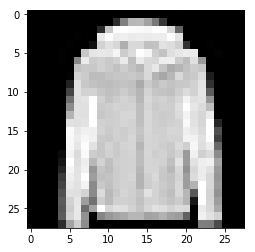

4


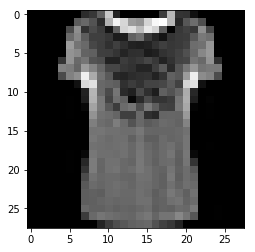

0


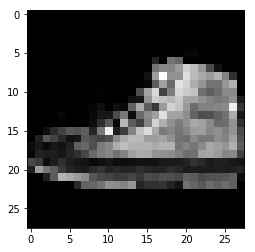

7


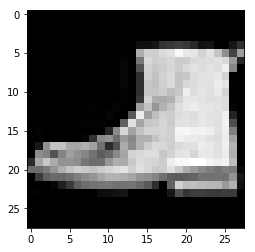

9


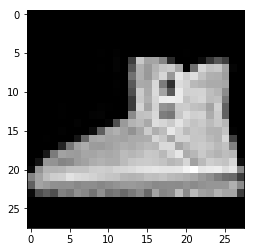

9


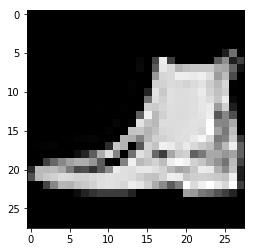

9


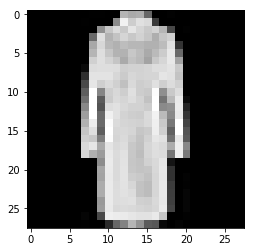

4


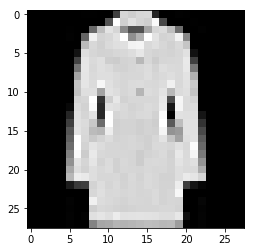

4


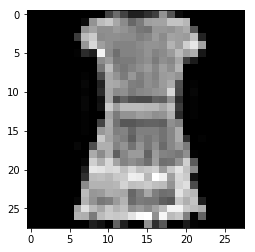

3


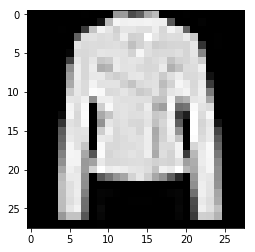

4


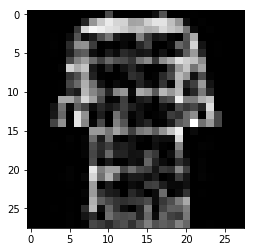

0


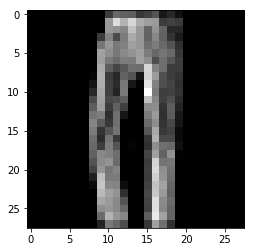

1


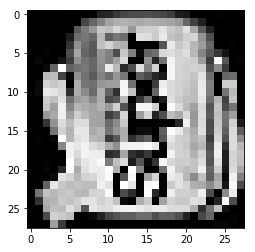

8


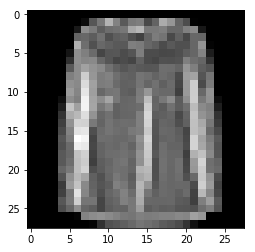

6


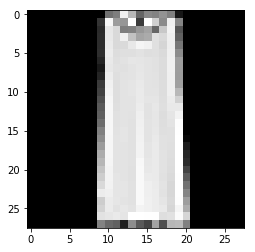

3


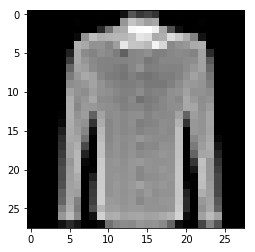

6


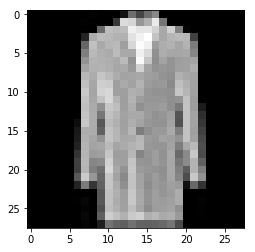

4


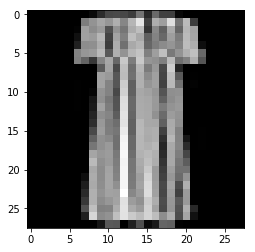

3


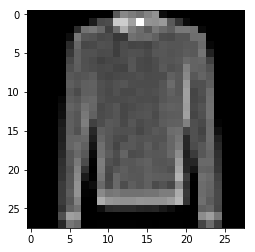

2
INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.CancelledError'>, Enqueue operation was cancelled
	 [[Node: input_producer_8/input_producer_8_EnqueueMany = QueueEnqueueManyV2[Tcomponents=[DT_STRING], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/cpu:0"](input_producer_8, input_producer_8/RandomShuffle)]]


In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#创建一个reader来读取TFRecord文件中的样例
reader = tf.TFRecordReader()
filename = tf.train.string_input_producer(['tfrecord/train.tfrecords'])

#从文件中读取一个样例
_,one_example = reader.read(filename)
#解析读入的数据
features = tf.parse_single_example(one_example,features={
    'labels':tf.FixedLenFeature([],tf.int64),
    'image_raw':tf.FixedLenFeature([],tf.string)
})
#将字符串解析成图像对应的像素数组
images = tf.decode_raw(features['image_raw'],tf.uint8)
labels = tf.cast(features['labels'],tf.int32)

with tf.Session() as sess:
    #启动多线程
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord = coord)
    for i in range(1,20):
        image, label = sess.run([images,labels])
        image = np.reshape(image, [28, 28])
        plt.imshow(image, plt.cm.gray)
        plt.show()
        print(label)